# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(['type']).count()['ride_id']


In [4]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(['type']).sum()['driver_count']


In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(['type']).sum()['fare']


In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fares/total_rides


In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares/total_drivers


In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({'Total Rides': total_rides, 
                                 'Total Drivers': total_drivers, 
                                 'Total Fares': total_fares, 
                                 'Average Fare per Ride': average_fare_per_ride, 
                                 'Average Fare per Driver': average_fare_per_driver})

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_fares_by_date = pyber_data_df.groupby(['type', 'date']).sum()[['fare']]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_fares_by_date = pyber_fares_by_date.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_fares_by_date = pyber_fares_by_date.pivot(index='date', columns='type', values='fare')

In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_fares_jan_april = pyber_fares_by_date.loc['1/1/2019':'4/28/2019']

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_fares_jan_april.index = pd.to_datetime(pyber_fares_jan_april.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_fares_jan_april.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2045 entries, 2019-01-10 00:17:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     104 non-null    float64
 1   Suburban  534 non-null    float64
 2   Urban     1409 non-null   float64
dtypes: float64(3)
memory usage: 63.9 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_fares_jan_april_week = pyber_fares_jan_april.resample('W').sum()

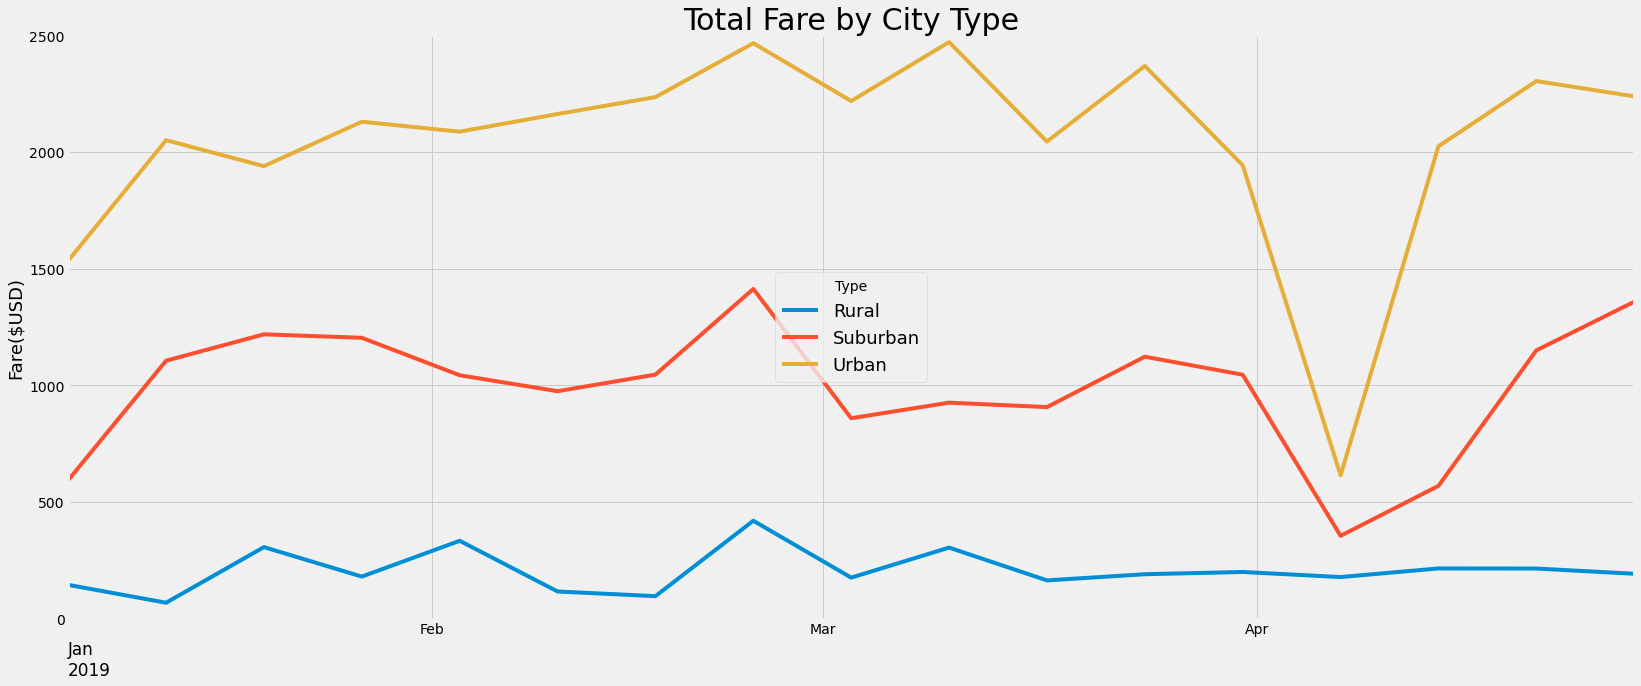

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
city_types= ['Rural', 'Suburban', "Urban"]

fig, ax = plt.subplots(1, 1, figsize=(25, 10))
ax.plot(pyber_fares_jan_april_week)

#create labels
ax.legend(city_types, title="Type", fontsize=18)
ax.set_title("Total Fare by City Type", fontsize=30)
ax.set_xlabel('Jan\n2019', loc='left')
ax.set_ylabel('Fare($USD)', fontsize=18)

#set limits
ax.set_ylim(0, 2500)
ax.set_xlim(pyber_fares_jan_april_week.index.min(), pyber_fares_jan_april_week.index.max())

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()
